In [1]:
#Download images from google images 
from google_images_download import google_images_download
#instantiate the class
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"lily","limit":5,"print_urls":True}
paths = response.download(arguments)
#print complete paths to the downloaded images
print(paths)



Item no.: 1 --> Item name = lily
Evaluating...
Starting Download...


Unfortunately all 5 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0

({'lily': []}, 0)


In [2]:
#Loading images from drive 

import gdown, zipfile, os

# The file id on the Drive
id='17ug45u9XK6-9CH3FPWI06qWdeJOEvPCH'
url='https://drive.google.com/uc?id={}'.format(id)
# The output zip file
output = 'Rainbow.zip'
# Now download the file
gdown.download(url,output,quiet=False)
# Unzip the files
with zipfile.ZipFile(os.path.abspath(output), 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('Rainbow')

Downloading...
From: https://drive.google.com/uc?id=17ug45u9XK6-9CH3FPWI06qWdeJOEvPCH
To: C:\Users\yanas\OneDrive\Masters\TMM\research\Rainbow.zip
100%|█████████████████████████████████████████████████████████████████████████████| 29.2k/29.2k [00:01<00:00, 18.8kB/s]


In [3]:
def get_all_filepaths(directory):
  '''
  A helper function to get all absolute file paths in a directory (recursively)
  :param directory:  The directory for which we want to get all file paths
  :return         :  A list of all absolute file paths as strings
  '''
  for dirpath,_,filenames in os.walk(directory):
    for f in sorted(filenames):
      yield os.path.abspath(os.path.join(dirpath, f))

In [4]:
import cv2
from PIL import Image

def load_sample_images(sample_pathnames):
  '''
  Initial loading the given images. 
  :param sample_pathnames: An array of image file paths that need to be opened
  :return:                 A dictionary of the form key:image_dictionary,
                           whereby image_dictionary itself is a dictionary 
                           containing the original image and the preprocessed
                           image for later steps
  '''
  sample_images = {}
  for filename in sample_pathnames:  # Loop through all images, load each file
    sample_images[filename] = {}
    sample_images[filename]['original'] = Image.open(filename)
    sample_images[filename]['cv2'] = cv2.imread(filename)
  return(sample_images)  

In [5]:
sample_pathnames = sorted(list(get_all_filepaths('rainbow')))
sample_images = load_sample_images(sample_pathnames)
print('We have loaded ' + str(len(sample_pathnames)) + ' images!')

We have loaded 5 images!


In [6]:
#Creating a frequency matrix 
import numpy as np

colorf = np.zeros((256,256,256))

print(colorf.shape)


(256, 256, 256)


In [7]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('images/test/rb1.jpg')

#_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

<Figure size 640x480 with 1 Axes>

<BarContainer object of 256 artists>

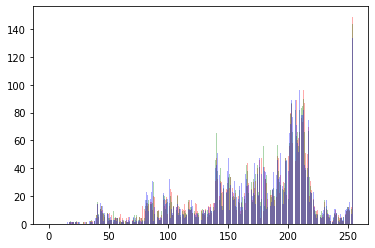

In [8]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import gdown, zipfile, os


nb_bins = 256
count_r = np.zeros(nb_bins)
count_g = np.zeros(nb_bins)
count_b = np.zeros(nb_bins)

root = 'images/test/'
for image in os.listdir(root):  
  if image.endswith('.jpg'):
    x = io.imread(root+image)
    hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
    hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.bar(bins[:-1], count_r, color='r', alpha=0.33)
plt.bar(bins[:-1], count_g, color='g', alpha=0.33)
plt.bar(bins[:-1], count_b, color='b', alpha=0.33)



In [9]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import gdown, zipfile, os
import pandas as pd

def histogrambuilder(filed):
    '''
    Main function that creates one colour - histogram of all images in a directory. 
    :param    filed:: name of directory containing images. 
        
    :returns: a dataframe containing the frecuencies pixels having a certain colour value in three channels (rbg) '''
    df = pd.DataFrame(index = [*range(0,256,1)])
    nb_bins = 256
    count_r = np.zeros(nb_bins)
    count_g = np.zeros(nb_bins)
    count_b = np.zeros(nb_bins)
    i = 0

    #root = 'images/Dutch/'
    for image in os.listdir(filed):
        if image.endswith('.jpg'):
            x = io.imread(filed+image)
            hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
            hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
            hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
            count_r += hist_r[0]
            count_g += hist_g[0]
            count_b += hist_b[0]

    bins = hist_r[1]
    fig = plt.figure()
    plt.bar(bins[:-1], count_r, color='r', alpha=0.33)
    plt.bar(bins[:-1], count_g, color='g', alpha=0.33)
    plt.bar(bins[:-1], count_b, color='b', alpha=0.33)
    plt.ylim(ymax = 10000)
    plt.title(filed)
    df['bins']=bins[:-1]
    df['r']=count_r
    df['b']=count_b
    df['g']=count_g
    return df

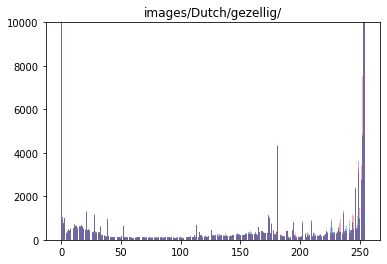

In [10]:
gezellig = histogrambuilder('images/Dutch/gezellig/')

C:\Users\yanas\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 9 bytes but only got 8. Skipping tag 33432
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\yanas\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\yanas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


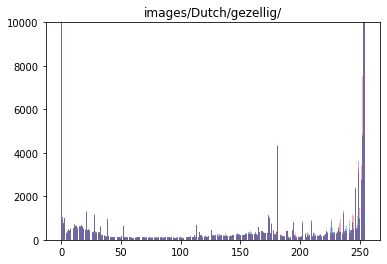

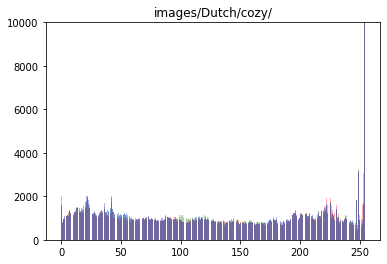

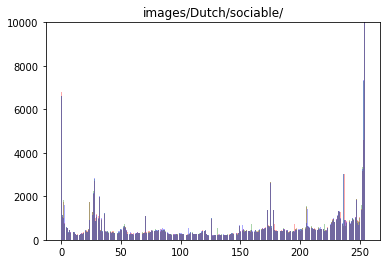

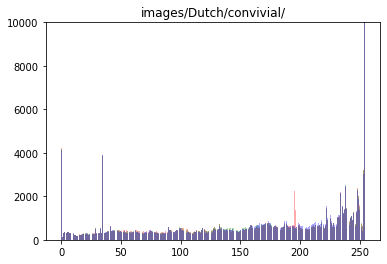

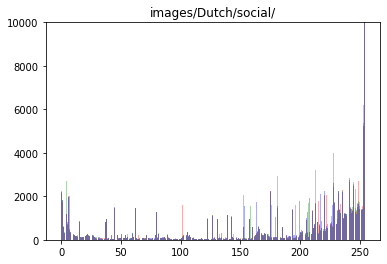

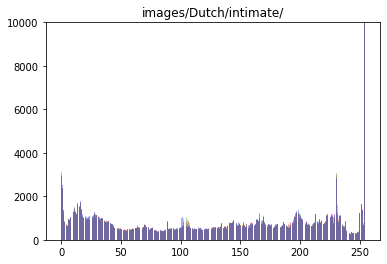

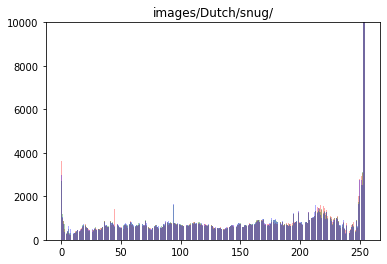

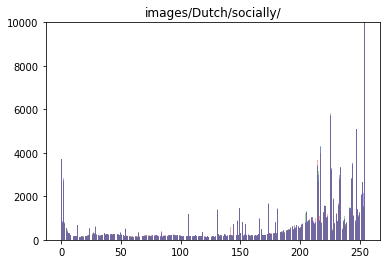

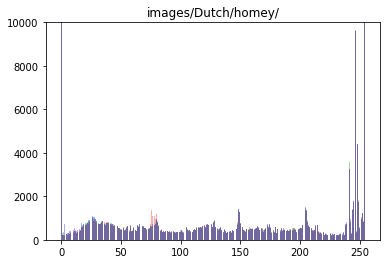

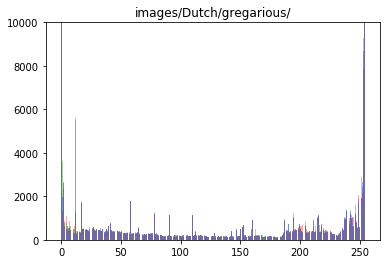

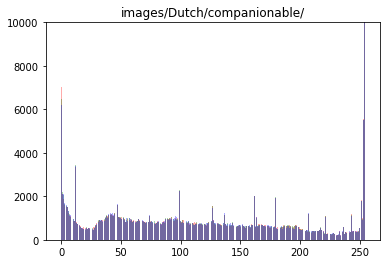

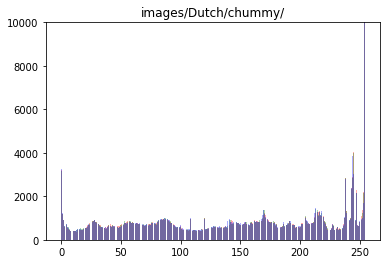

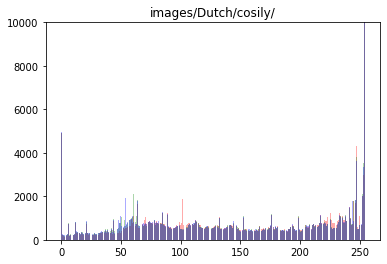

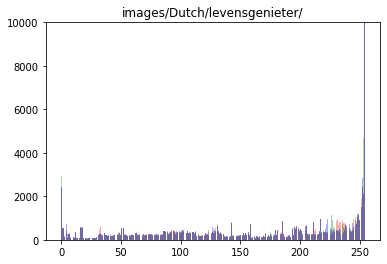

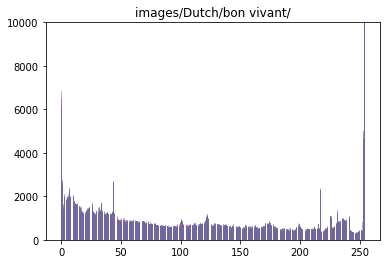

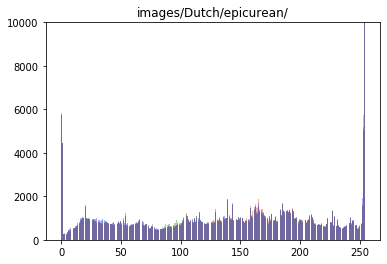

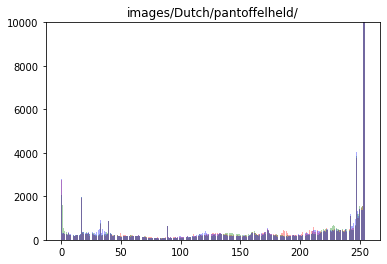

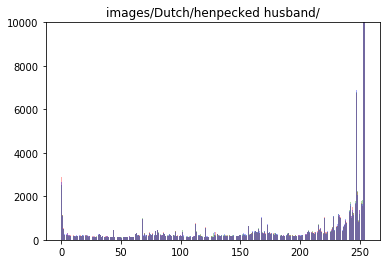

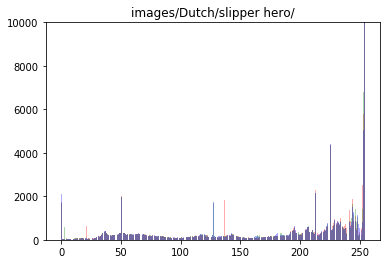

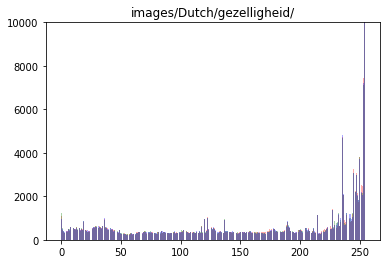

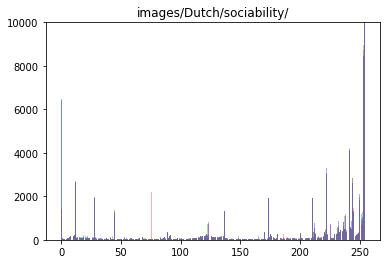

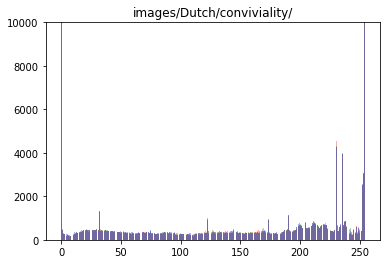

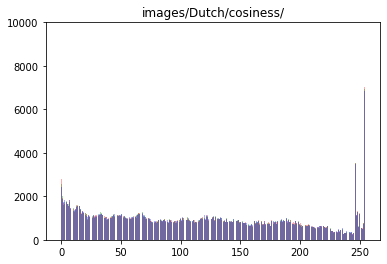

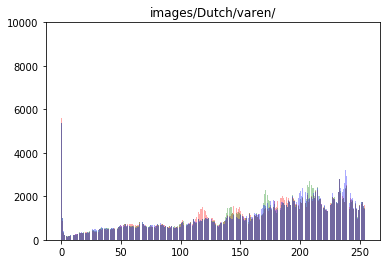

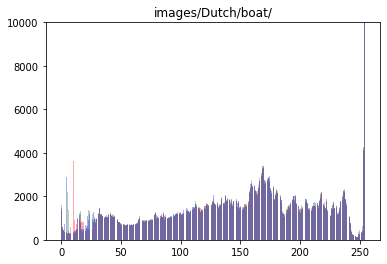

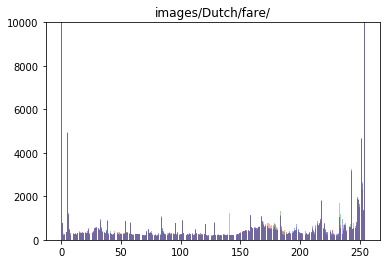

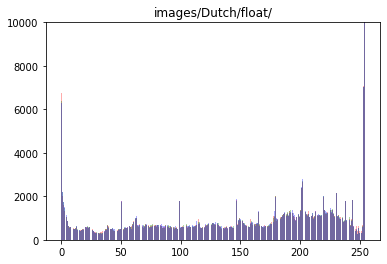

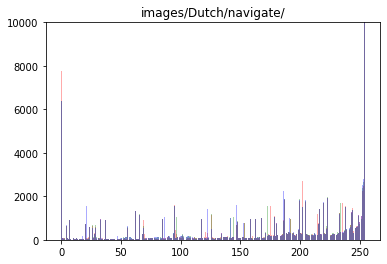

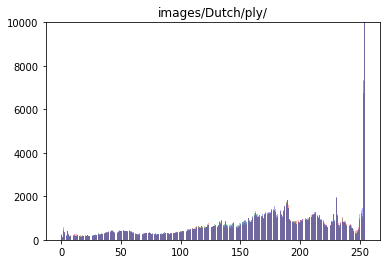

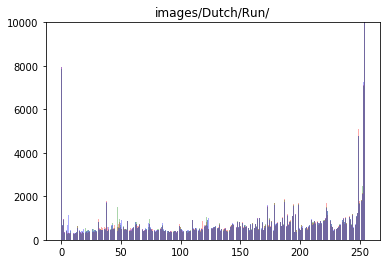

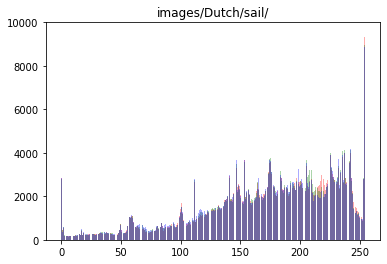

In [11]:
#creating colour frequencie dataframes for the 'Dutch' section 
#c1 Gezellig 
gezellig = histogrambuilder('images/Dutch/gezellig/')
cozy = histogrambuilder('images/Dutch/cozy/')
sociable = histogrambuilder('images/Dutch/sociable/')
convivial = histogrambuilder('images/Dutch/convivial/')
social = histogrambuilder('images/Dutch/social/')
intimate = histogrambuilder('images/Dutch/intimate/')
snug = histogrambuilder('images/Dutch/snug/')
socially = histogrambuilder('images/Dutch/socially/')
homey = histogrambuilder('images/Dutch/homey/')
gregarious = histogrambuilder('images/Dutch/gregarious/')
companionable = histogrambuilder('images/Dutch/companionable/')
chummy = histogrambuilder('images/Dutch/chummy/')
cosily = histogrambuilder('images/Dutch/cosily/')

#c2 Levensgenieter 
levensgenieter = histogrambuilder('images/Dutch/levensgenieter/')
bonvivant = histogrambuilder('images/Dutch/bon vivant/')
epicurean = histogrambuilder('images/Dutch/epicurean/')

#c3 Pantoffelheld 
pantoffelheld = histogrambuilder('images/Dutch/pantoffelheld/')
henpeckedhusband = histogrambuilder('images/Dutch/henpecked husband/')
slipperhero = histogrambuilder('images/Dutch/slipper hero/')

#c4 Gezelligheid 
gezelligheid = histogrambuilder('images/Dutch/gezelligheid/')
sociability = histogrambuilder('images/Dutch/sociability/')
conviviality = histogrambuilder('images/Dutch/conviviality/')
cosiness = histogrambuilder('images/Dutch/cosiness/')

#c5 Varen 
varen = histogrambuilder('images/Dutch/varen/')
boat = histogrambuilder('images/Dutch/boat/')
fare = histogrambuilder('images/Dutch/fare/')
tofloat = histogrambuilder('images/Dutch/float/')
navigate = histogrambuilder('images/Dutch/navigate/')
ply = histogrambuilder('images/Dutch/ply/')
run = histogrambuilder('images/Dutch/Run/')
sail = histogrambuilder('images/Dutch/sail/')







In [12]:
from scipy.stats import chisquare 
import statistics

def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[0]))   

#c1 Gezellig 

c11r = chisquare(gezellig['r'], cozy['r'])
c11b = chisquare(gezellig['b'], cozy['b'])
c11g = chisquare(gezellig['g'], cozy['g'])
c12r = chisquare(gezellig['r'], sociable['r'])
c12b = chisquare(gezellig['b'], sociable['b'])
c12g = chisquare(gezellig['g'], sociable['g'])
c13r = chisquare(gezellig['r'], convivial['r'])
c13b = chisquare(gezellig['b'], convivial['b'])
c13g = chisquare(gezellig['g'], convivial['g'])
c14r = chisquare(gezellig['r'], social['r'])
c14b = chisquare(gezellig['b'], social['b'])
c14g = chisquare(gezellig['g'], social['g'])
c15r = chisquare(gezellig['r'], intimate['r'])
c15b = chisquare(gezellig['b'], intimate['b'])
c15g = chisquare(gezellig['g'], intimate['g'])
c16r = chisquare(gezellig['r'], snug['r'])
c16b = chisquare(gezellig['b'], snug['b'])
c16g = chisquare(gezellig['g'], snug['g'])
c17r = chisquare(gezellig['r'], socially['r'])
c17b = chisquare(gezellig['b'], socially['b'])
c17g = chisquare(gezellig['g'], socially['g'])
c18r = chisquare(gezellig['r'], homey['r'])
c18b = chisquare(gezellig['b'], homey['b'])
c18g = chisquare(gezellig['g'], homey['g'])
c19r = chisquare(gezellig['r'], gregarious['r'])
c19b = chisquare(gezellig['b'], gregarious['b'])
c19g = chisquare(gezellig['g'], gregarious['g'])
c110r = chisquare(gezellig['r'], companionable['r'])
c110b = chisquare(gezellig['b'], companionable['b'])
c110g = chisquare(gezellig['g'], companionable['g'])
c111r = chisquare(gezellig['r'], chummy['r'])
c111b = chisquare(gezellig['b'], chummy['b'])
c111g = chisquare(gezellig['g'], chummy['g'])
c112r = chisquare(gezellig['r'], cosily['r'])
c112b = chisquare(gezellig['b'], cosily['b'])
c112g = chisquare(gezellig['g'], cosily['g'])

csvalues= []
csvalues.append((statistics.mean([c11r[0],c11b[0],c11g[0]]), 'c11') )
csvalues.append((statistics.mean([c12r[0],c12b[0],c12g[0]]), 'c12') )
csvalues.append((statistics.mean([c13r[0],c13b[0],c13g[0]]),'c13'))
csvalues.append((statistics.mean([c14r[0],c14b[0],c14g[0]]),'c14'))
csvalues.append((statistics.mean([c15r[0],c15b[0],c15g[0]]),' c15'))
csvalues.append((statistics.mean([c16r[0],c16b[0],c16g[0]]),'c16'))
csvalues.append((statistics.mean([c17r[0],c17b[0],c17g[0]]),'c17'))
csvalues.append((statistics.mean([c18r[0],c18b[0],c18g[0]]), 'c18'))
csvalues.append((statistics.mean([c19r[0],c19b[0],c19g[0]]), 'c19'))
csvalues.append((statistics.mean([c110r[0],c110b[0],c110g[0]]), 'c110'))
csvalues.append((statistics.mean([c111r[0],c111b[0],c111g[0]]),'c111'))
csvalues.append((statistics.mean([c112r[0],c112b[0],c112g[0]]), 'c112'))

print(Sort_Tuple(csvalues))




[(131535.84109174658, 'c12'), (143438.26728444293, 'c16'), (209732.01722209022, 'c112'), (236311.66763660015, 'c110'), (246030.78761996966, 'c13'), (251756.09540258147, 'c19'), (252348.41490705922, 'c14'), (282577.6524518026, 'c17'), (294371.8940369965, 'c111'), (412338.7322586647, 'c11'), (470067.1605736037, 'c18'), (620905.8798083278, ' c15')]


In [13]:
#c2 

#calculating chisquare value 
c21r = chisquare(levensgenieter['r'], bonvivant['r'])
c21b = chisquare(levensgenieter['b'], bonvivant['b'])
c21g = chisquare(levensgenieter['g'], bonvivant['g'])

c22r = chisquare(levensgenieter['r'], epicurean['r'])
c22b = chisquare(levensgenieter['b'], epicurean['b'])
c22g = chisquare(levensgenieter['g'], epicurean['g'])

#assigning average chisquare value 
csvalues2 = []
csvalues2.append((statistics.mean([c21r[0],c21b[0],c21g[0]]), 'c21') )
csvalues2.append((statistics.mean([c22r[0],c22b[0],c22g[0]]), 'c22') )

print(Sort_Tuple(csvalues2))

[(137383.06172965345, 'c22'), (183496.0069115371, 'c21')]


In [14]:
#c3

#calculating chisquare value 
c31r = chisquare(pantoffelheld['r'], henpeckedhusband['r'])
c31b = chisquare(pantoffelheld['b'], henpeckedhusband['b'])
c31g = chisquare(pantoffelheld['g'], henpeckedhusband['g'])

c32r = chisquare(pantoffelheld['r'], slipperhero['r'])
c32b = chisquare(pantoffelheld['b'], slipperhero['b'])
c32g = chisquare(pantoffelheld['g'], slipperhero['g'])

#assigning average chisquare value 
csvalues3 = []
csvalues3.append((statistics.mean([c31r[0],c31b[0],c31g[0]]), 'c31') )
csvalues3.append((statistics.mean([c32r[0],c32b[0],c32g[0]]), 'c32') )

print(Sort_Tuple(csvalues3))



[(50218.6644333171, 'c31'), (169280.2890621459, 'c32')]


In [15]:
#c4

#calculating chisquare value 
c41r = chisquare(gezelligheid['r'], sociability['r'])
c41b = chisquare(gezelligheid['b'], sociability['b'])
c41g = chisquare(gezelligheid['g'], sociability['g'])

c42r = chisquare(gezelligheid['r'], conviviality['r'])
c42b = chisquare(gezelligheid['b'], conviviality['b'])
c42g = chisquare(gezelligheid['g'], conviviality['g'])

c43r = chisquare(gezelligheid['r'], cosiness['r'])
c43b = chisquare(gezelligheid['b'], cosiness['b'])
c43g = chisquare(gezelligheid['g'], cosiness['g'])

#assigning average chisquare value 
csvalues4 = []
csvalues4.append((statistics.mean([c41r[0],c41b[0],c41g[0]]), 'c41') )
csvalues4.append((statistics.mean([c42r[0],c42b[0],c42g[0]]), 'c42') )
csvalues4.append((statistics.mean([c43r[0],c43b[0],c43g[0]]), 'c43') )

print(Sort_Tuple(csvalues4))




[(142344.31581929626, 'c42'), (494758.47644747567, 'c43'), (617778.097630219, 'c41')]


In [16]:
#c5

#calculating chisquare value 
c51r = chisquare(varen['r'], boat['r'])
c51b = chisquare(varen['b'], boat['b'])
c51g = chisquare(varen['g'], boat['g'])

c52r = chisquare(varen['r'], fare['r'])
c52b = chisquare(varen['b'], fare['b'])
c52g = chisquare(varen['g'], fare['g'])

c53r = chisquare(varen['r'], tofloat['r'])
c53b = chisquare(varen['b'], tofloat['b'])
c53g = chisquare(varen['g'], tofloat['g'])


c54r = chisquare(varen['r'], navigate['r'])
c54b = chisquare(varen['b'], navigate['b'])
c54g = chisquare(varen['g'], navigate['g'])

c55r = chisquare(varen['r'], ply['r'])
c55b = chisquare(varen['b'], ply['b'])
c55g = chisquare(varen['g'], ply['g'])

c56r = chisquare(varen['r'], run['r'])
c56b = chisquare(varen['b'], run['b'])
c56g = chisquare(varen['g'], run['g'])

c57r = chisquare(varen['r'], sail['r'])
c57b = chisquare(varen['b'], sail['b'])
c57g = chisquare(varen['g'], sail['g'])

#assigning average chisquare value 
csvalues5 = []
csvalues5.append((statistics.mean([c51r[0],c51b[0],c51g[0]]), 'c51') )
csvalues5.append((statistics.mean([c52r[0],c52b[0],c52g[0]]), 'c52') )
csvalues5.append((statistics.mean([c53r[0],c53b[0],c53g[0]]), 'c53') )
csvalues5.append((statistics.mean([c54r[0],c54b[0],c54g[0]]), 'c54') )
csvalues5.append((statistics.mean([c55r[0],c55b[0],c55g[0]]), 'c55') )
csvalues5.append((statistics.mean([c56r[0],c56b[0],c56g[0]]), 'c56') )
csvalues5.append((statistics.mean([c57r[0],c57b[0],c57g[0]]), 'c57') )

print(Sort_Tuple(csvalues5))




[(72127.18467798097, 'c57'), (122212.99840129464, 'c53'), (181509.52404774795, 'c51'), (213052.57273657699, 'c56'), (309047.868870432, 'c55'), (603278.6435182111, 'c52'), (1528126.2915958501, 'c54')]


In [17]:
# Python3 program for the above approach 

# Function returns the minimum cost 
# to sort the given array 
def minCost(arr, n):
	
	# Create array of pairs in which 
	# 1st element is the array element 
	# and 2nd element is index of first 
	sortedarr = []
	
	# Initialize the total cost 
	total_cost = 0
	
	for i in range(n):
		sortedarr.append([arr[i], i])
		
	# Sort the array with respect to 
	# array value 
	sortedarr.sort()
	
	# Initialize the overall minimum 
	# which is the 1st element 
	overall_minimum = sortedarr[0][0]
	
	# To keep track of visited elements 
	# create a visited array & initialize 
	# all elements as not visited 
	vis = [False] * n
	
	# Iterate over every element 
	# of the array 
	for i in range(n):
		
		# If the element is visited or 
		# in the sorted position, and 
		# check for next element 
		if vis[i] and sortedarr[i][1] == i:
			continue
		
		# Create a vector which stores 
		# all elements of a cycle 
		v = []
		j = i
		size = 0
		
		# It covers all the elements 
		# of a cycle 
		while vis[j] == False:
			vis[j] = True
			v.append(sortedarr[j][0])
			j = sortedarr[j][1]
			size += 1
			
		# If cycle is found then the 
		# swapping is required 
		if size != 0:
			
			# Initialize local minimum with 
			# 1st element of the vector as 
			# it contains the smallest 
			# element in the beginning 
			local_minimum = v[0]
			result1 = 0
			result2 = 0
			
			# Stores the cost with using only 
			# local minimum value. 
			for k in range(1, size):
				result1 += abs(local_minimum - v[k])
				
			# Stores the cost of using both 
			# local minimum and overall minimum 
			for k in range(size):
				result2 += abs(overall_minimum - v[k])
				
			# Update the result2 
			result2 += (overall_minimum *
						local_minimum)
			
			# Store the minimum of the 
			# two result to total cost 
			total_cost += min(result1, result2)
			
	# Return the minimum cost 
	return total_cost

# Driver code

# Given array arr[] 
A = [ 1, 5, 3, 4, 2 ]

# Function call 
ans = minCost(A, len(A))

print(ans)

# This code is contributed by kumarkashyap


3


In [18]:

#ranking distance order list thingy 

gezellig = [1,12,3,2,9,10,11,8,6,5,4,7]
levensgenieter =[1,2]
pantoffelheld = [1,2]
gezelligheid = [3,1,2]
varen = [2,3,4,7,5,1,6]

gezellig_ct = [10,3,5,1,6,4,9,11,2,12,7,8]
levensgenieter_ct=[2,1]
pantoffelheld_ct=[1,2]
gezelligheid_ct=[2,3,1]
varen_ct=[6,2,7,1,5,3,4]

coast_gt = minCost(gezellig, len(gezellig))+minCost(levensgenieter,len(levensgenieter))+minCost(pantoffelheld, len(pantoffelheld))+minCost(gezelligheid,len(gezelligheid))+minCost(varen, len(varen))
print(coast_gt)

coast_ct = minCost(gezellig_ct, len(gezellig_ct))+minCost(levensgenieter_ct,len(levensgenieter_ct))+minCost(pantoffelheld_ct, len(pantoffelheld_ct))+minCost(gezelligheid_ct,len(gezelligheid_ct))+minCost(varen_ct, len(varen_ct))
print(coast_ct)

56
86


# RQ 2 

C:\Users\yanas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\yanas\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


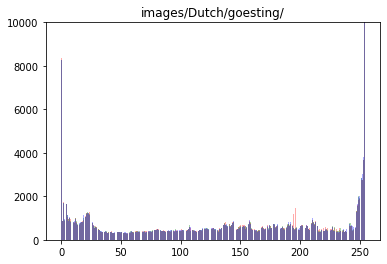

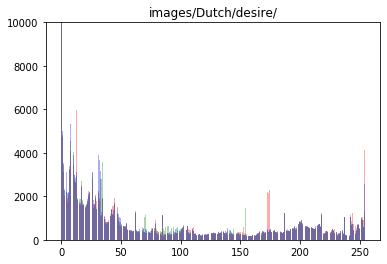

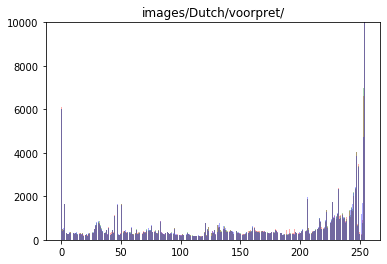

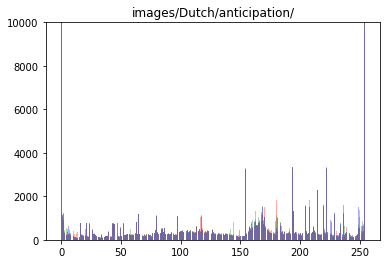

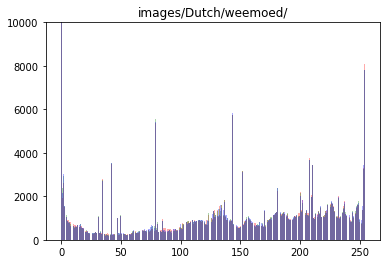

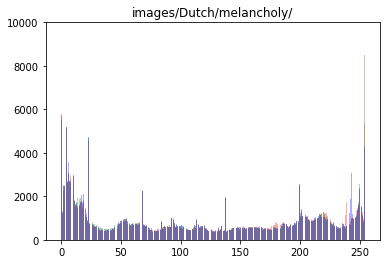

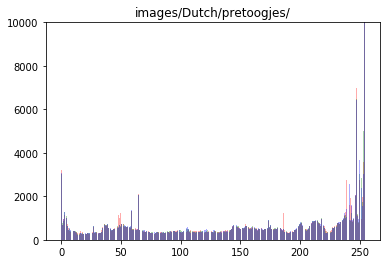

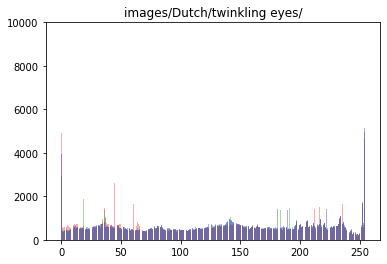

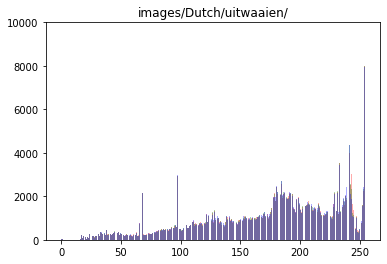

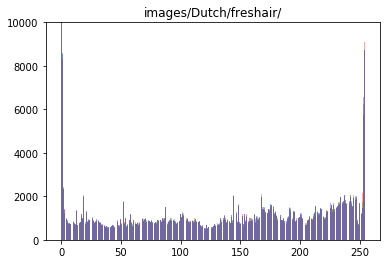

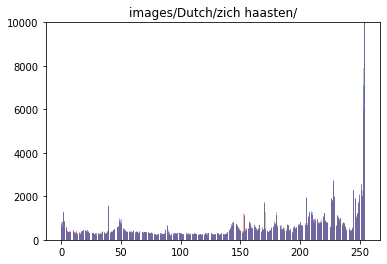

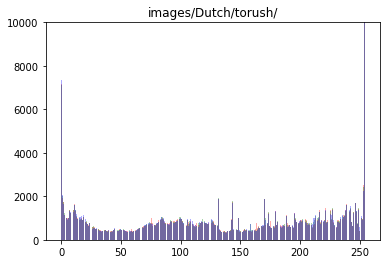

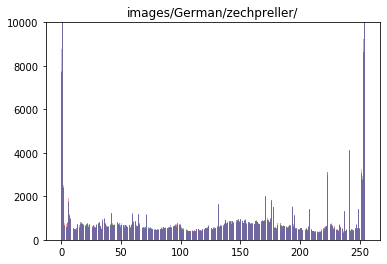

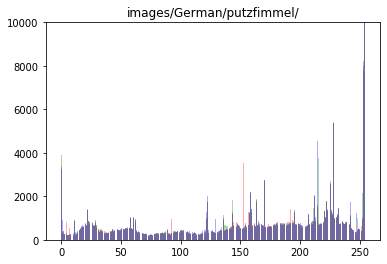

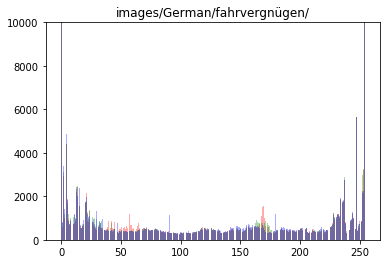

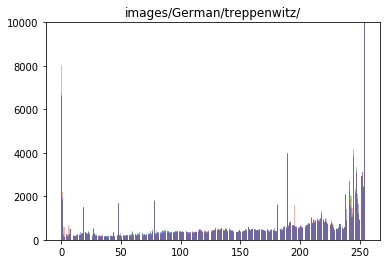

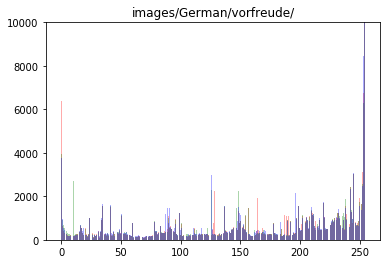

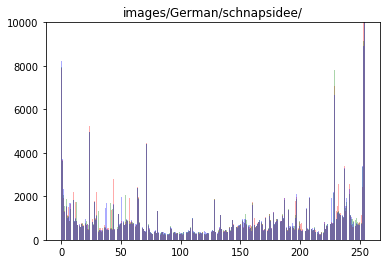

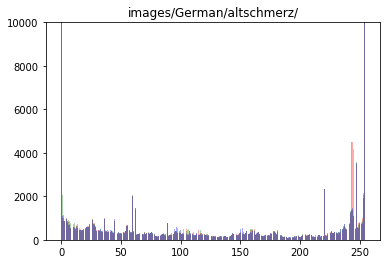

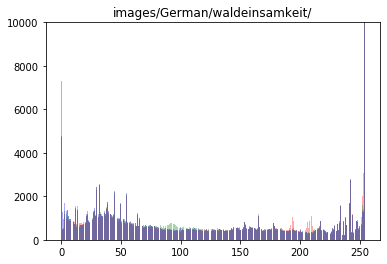

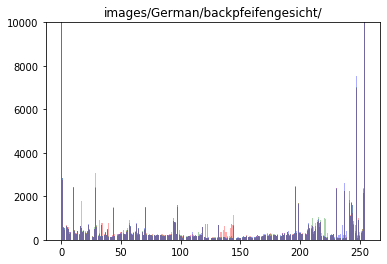

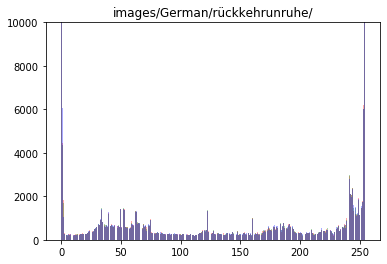

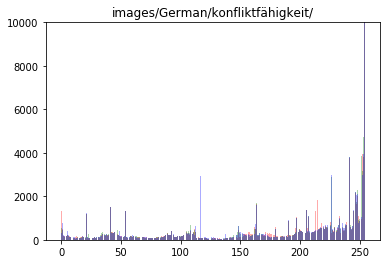

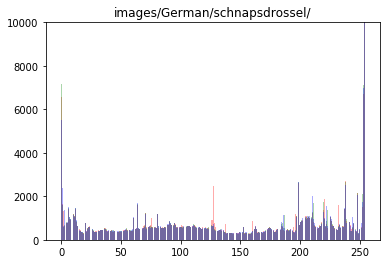

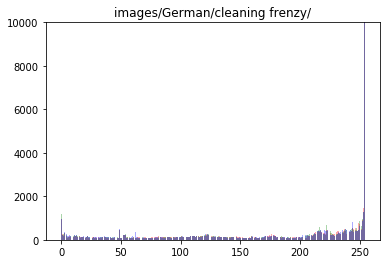

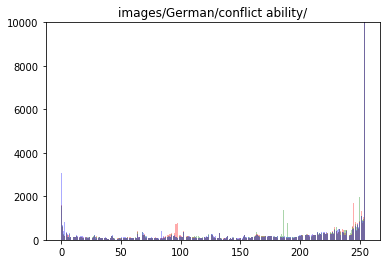

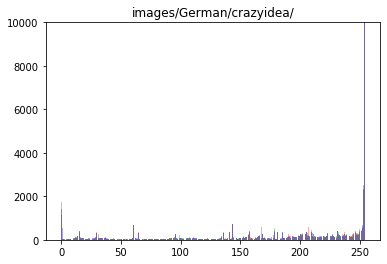

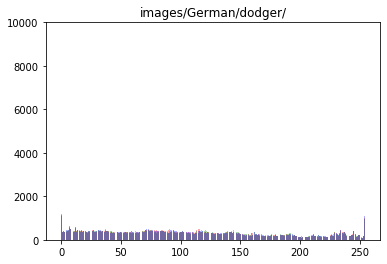

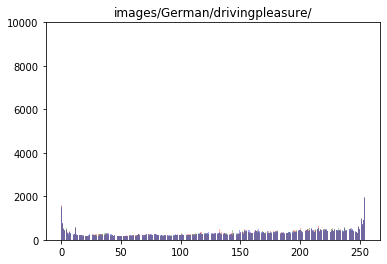

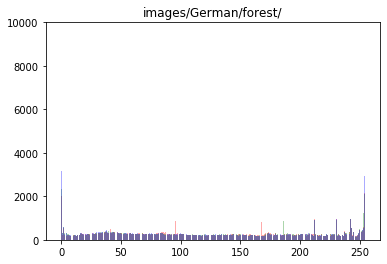

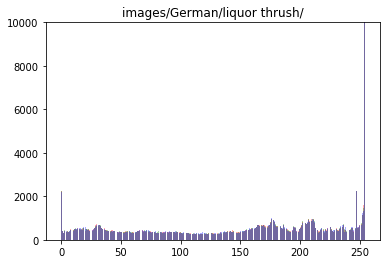

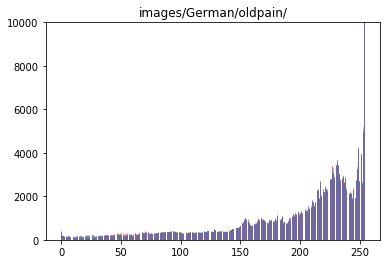

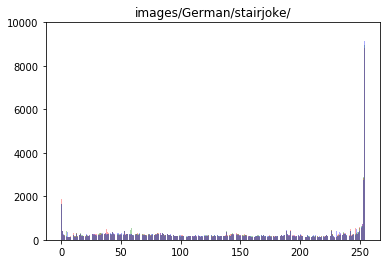

In [19]:
#loading in pictures 

#dutch
goesting = histogrambuilder('images/Dutch/goesting/')
desire = histogrambuilder('images/Dutch/desire/')
voorpret = histogrambuilder('images/Dutch/voorpret/')
anticipation = histogrambuilder('images/Dutch/anticipation/')
weemoed = histogrambuilder('images/Dutch/weemoed/')
melancholy = histogrambuilder('images/Dutch/melancholy/')
pretoogjes = histogrambuilder('images/Dutch/pretoogjes/')
twinklingeyes = histogrambuilder('images/Dutch/twinkling eyes/')
uitwaaien = histogrambuilder('images/Dutch/uitwaaien/')
freshair = histogrambuilder('images/Dutch/freshair/')
zichhaasten = histogrambuilder('images/Dutch/zich haasten/')
torush = histogrambuilder('images/Dutch/torush/')

#german 
zechpreller = histogrambuilder('images/German/zechpreller/')
putzfimmel = histogrambuilder('images/German/putzfimmel/')
fahrvergnügen = histogrambuilder('images/German/fahrvergnügen/')
treppenwitz = histogrambuilder('images/German/treppenwitz/')
vorfreude = histogrambuilder('images/German/vorfreude/')
schnapsidee = histogrambuilder('images/German/schnapsidee/')
altschmerz = histogrambuilder('images/German/altschmerz/')
waldeinsamkeit = histogrambuilder('images/German/waldeinsamkeit/')
backpfeifengesicht = histogrambuilder('images/German/backpfeifengesicht/')
rückkehrunruhe = histogrambuilder('images/German/rückkehrunruhe/')
konfliktfähigkeit = histogrambuilder('images/German/konfliktfähigkeit/')
schnapsdrossel = histogrambuilder('images/German/schnapsdrossel/')
cleaningfrenzy = histogrambuilder('images/German/cleaning frenzy/')
conflictability = histogrambuilder('images/German/conflict ability/')
crazyidea = histogrambuilder('images/German/crazyidea/')
dodger = histogrambuilder('images/German/dodger/')
drivingpleasure = histogrambuilder('images/German/drivingpleasure/')

#fistface = histogrambuilder('images/German/fistface/')
forest = histogrambuilder('images/German/forest/')
liquorthrush = histogrambuilder('images/German/liquor thrush/')
oldpain = histogrambuilder('images/German/oldpain/')
#returnunrest = histogrambuilder('images/German/return unrest/')
stairjoke = histogrambuilder('images/German/stairjoke/')


In [20]:
#chisquare 

#dutch combinations

#goesting-desire

c1r = chisquare(goesting['r'], desire['r'])
c1b = chisquare(goesting['b'], desire['b'])
c1g = chisquare(goesting['g'], desire['g'])
c1 = statistics.mean([c1r[0], c1b[0],c1g[0]])

#voorpret-anticipation
c2r = chisquare(voorpret['r'], anticipation['r'])
c2b = chisquare(voorpret['b'], anticipation['b'])
c2g = chisquare(voorpret['g'], anticipation['g'])
c2 = statistics.mean([c2r[0], c2b[0],c2g[0]])

#weemoed-melancholy

c3r = chisquare(weemoed['r'], melancholy['r'])
c3b = chisquare(weemoed['b'], melancholy['b'])
c3g = chisquare(weemoed['g'], melancholy['g'])
c3 = statistics.mean([c3r[0], c3b[0],c3g[0]])

#pretoogjes-twinkeleyes

c4r = chisquare(pretoogjes['r'], twinklingeyes['r'])
c4b = chisquare(pretoogjes['b'], twinklingeyes['b'])
c4g = chisquare(pretoogjes['g'], twinklingeyes['g'])
c4 = statistics.mean([c4r[0], c4b[0],c4g[0]])

#uitwaaien - fresh air

c5r = chisquare(uitwaaien['r'], freshair['r'])
c5b = chisquare(uitwaaien['b'], freshair['b'])
c5g = chisquare(uitwaaien['g'], freshair['g'])
c5 = statistics.mean([c5r[0], c5b[0],c5g[0]])

#zich haasten - to rush

c6r = chisquare(zichhaasten['r'], torush['r'])
c6b = chisquare(zichhaasten['b'], torush['b'])
c6g = chisquare(zichhaasten['g'], torush['g'])
c6 = statistics.mean([c6r[0], c6b[0],c6g[0]])







In [21]:
#german combinations
g1r = chisquare(zechpreller['r'], dodger['r'])
g1b = chisquare(zechpreller['b'], dodger['b'])
g1g = chisquare(zechpreller['g'], dodger['g'])
g1 = statistics.mean([g1r[0], g1b[0],g1g[0]])

g2r = chisquare(putzfimmel['r'], cleaningfrenzy['r'])
g2b = chisquare(putzfimmel['b'], cleaningfrenzy['b'])
g2g = chisquare(putzfimmel['g'], cleaningfrenzy['g'])
g2 = statistics.mean([g2r[0], g2b[0],g2g[0]])

g3r = chisquare(fahrvergnügen['r'], drivingpleasure['r'])
g3b = chisquare(fahrvergnügen['b'], drivingpleasure['b'])
g3g = chisquare(fahrvergnügen['g'], drivingpleasure['g'])
g3 = statistics.mean([g3r[0], g3b[0],g3g[0]])

g4r = chisquare(treppenwitz['r'], stairjoke['r'])
g4b = chisquare(treppenwitz['b'], stairjoke['b'])
g4g = chisquare(treppenwitz['g'], stairjoke['g'])
g4 = statistics.mean([g4r[0], g4b[0],g4g[0]])

g5r = chisquare(konfliktfähigkeit['r'], conflictability['r'])
g5b = chisquare(konfliktfähigkeit['b'], conflictability['b'])
g5g = chisquare(konfliktfähigkeit['g'], conflictability['g'])
g5 = statistics.mean([g5r[0], g5b[0],g5g[0]])

g6r = chisquare(vorfreude['r'], anticipation['r'])
g6b = chisquare(vorfreude['b'], anticipation['b'])
g6g = chisquare(vorfreude['g'], anticipation['g'])
g6 = statistics.mean([g6r[0], g6b[0],g6g[0]])

g7r = chisquare(schnapsidee['r'], crazyidea['r'])
g7b = chisquare(schnapsidee['b'], crazyidea['b'])
g7g = chisquare(schnapsidee['g'], crazyidea['g'])
g7 = statistics.mean([g7r[0], g7b[0],g7g[0]])

g8r = chisquare(altschmerz['r'], oldpain['r'])
g8b = chisquare(altschmerz['b'], oldpain['b'])
g8g = chisquare(altschmerz['g'], oldpain['g'])
g8 = statistics.mean([g8r[0], g8b[0],g8g[0]])

g9r = chisquare(waldeinsamkeit['r'], forest['r'])
g9b = chisquare(waldeinsamkeit['b'], forest['b'])
g9g = chisquare(waldeinsamkeit['g'], forest['g'])
g9 = statistics.mean([g9r[0], g9b[0],g9g[0]])

g10r = chisquare(schnapsdrossel['r'], liquorthrush['r'])
g10b = chisquare(schnapsdrossel['b'], liquorthrush['b'])
g10g = chisquare(schnapsdrossel['g'], liquorthrush['g'])
g10 = statistics.mean([g10r[0], g10b[0],g10g[0]])



In [22]:

chisquaresd = [(c1,'c1'),(c2,'c2'),(c3,'c3'),(c4, 'c4'), (c5,'c5'),(c6,'c6')]
chisquaresg = [(g1,'g1'),(g2,'g2'),(g3,'g3'),(g4, 'g4'), (g5,'g5'),(g6,'g6'),(g7,'g7'),(g8,'g8'),(g9,'g9'),(g10, 'g10')]

print(chisquaresd,chisquaresg)


[(1156517.0115146344, 'c1'), (410526.3516511076, 'c2'), (372643.7649493862, 'c3'), (515750.44577462634, 'c4'), (125369.21150930456, 'c5'), (120515.86146110189, 'c6')] [(1705036.5635812234, 'g1'), (827013.4981284922, 'g2'), (1142189.177664322, 'g3'), (469696.67862791294, 'g4'), (431983.01726837916, 'g5'), (472998.3239596137, 'g6'), (4816071.1048039915, 'g7'), (881684.8920316539, 'g8'), (392325.0350885654, 'g9'), (134864.15210993082, 'g10')]


In [23]:
# dataframe prep 
df = pd.DataFrame()
df['label']=['c1','c2','c3','c4','c5','c6','g1','g2','g3','g4','g5','g6','g7','g8','g9','g10']
df['chisquare']=[c1,c2,c3,c4,c5,c6,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10]
df['translation']=[100,94,80,100,90,100, 70,75,88,9,10,93,95, 50, 82, 5]
print(df)


   label     chisquare  translation
0     c1  1.156517e+06          100
1     c2  4.105264e+05           94
2     c3  3.726438e+05           80
3     c4  5.157504e+05          100
4     c5  1.253692e+05           90
5     c6  1.205159e+05          100
6     g1  1.705037e+06           70
7     g2  8.270135e+05           75
8     g3  1.142189e+06           88
9     g4  4.696967e+05            9
10    g5  4.319830e+05           10
11    g6  4.729983e+05           93
12    g7  4.816071e+06           95
13    g8  8.816849e+05           50
14    g9  3.923250e+05           82
15   g10  1.348642e+05            5


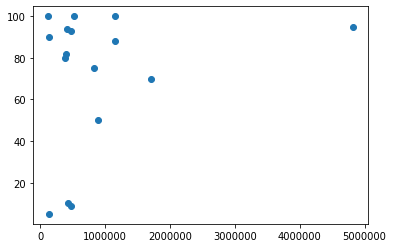

In [24]:
#plotting data
import matplotlib.pyplot as plt

plt.scatter(df['chisquare'], df['translation'])


In [25]:
from sklearn.linear_model import LinearRegression

x = df['chisquare'].values.reshape(-1, 1)
y = df['translation'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)


reg = LinearRegression().fit(x, y)
y_pred = linear_regressor.predict(x)




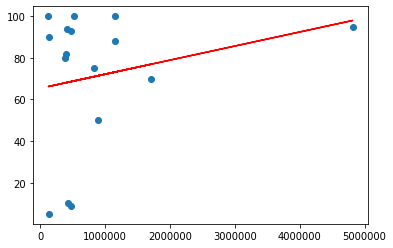

In [26]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))


Coefficients: 
 [[6.76314369e-06]]
Mean squared error: 1028.37
Coefficient of determination: 0.05


In [33]:
import statsmodels.api as sm

est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())


C:\Users\yanas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.408
Model:                            OLS   Adj. R-squared (uncentered):              0.368
Method:                 Least Squares   F-statistic:                              10.32
Date:                Sun, 24 Jan 2021   Prob (F-statistic):                     0.00581
Time:                        15:17:09   Log-Likelihood:                         -88.332
No. Observations:                  16   AIC:                                      178.7
Df Residuals:                      15   BIC:                                      179.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------